<a href="https://colab.research.google.com/github/ekansh2004/Machine-Learning-Projects/blob/main/ExtictionReason.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive

In [3]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/extinct_species_dataset.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [4]:
df.head()

,Species Name,Years Lived (Million Years),Extinction Reason
0,Trilobite,337.75,Human Impact
1,Smilodon,311.57,Natural Disaster
2,Dodo,67.49,Mass Extinction
3,Woolly Mammoth,89.81,Asteroid Impact
4,Woolly Mammoth,395.72,Climate Change


In [5]:
df.describe()

,Years Lived (Million Years)
count,1000000.000000
mean,250.619174
std,143.983613
min,1.000000
25%,126.020000
50%,250.590000
75%,375.442500
max,500.000000


In [6]:
df.isnull().sum()

,0
Species Name,0
Years Lived (Million Years),0
Extinction Reason,0


In [7]:
df.dropna(inplace=True)

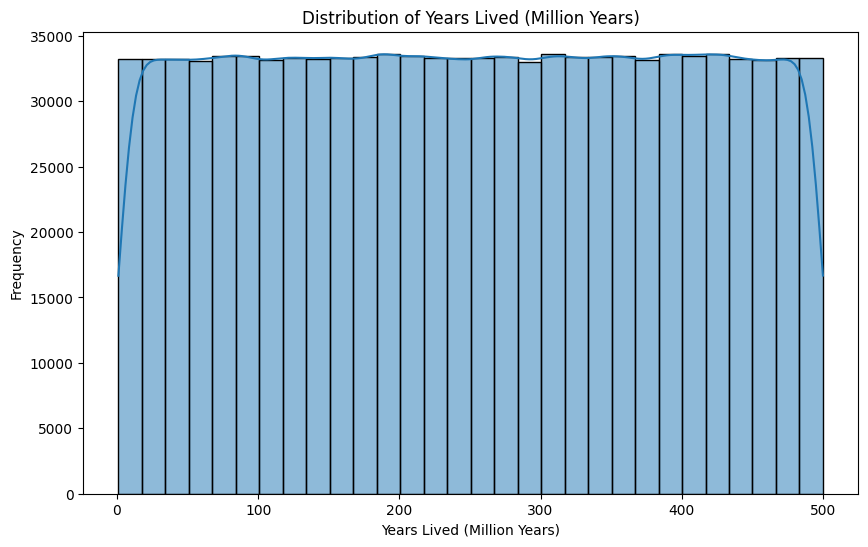

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Years Lived (Million Years)'], bins=30, kde=True)
plt.title('Distribution of Years Lived (Million Years)')
plt.xlabel('Years Lived (Million Years)')
plt.ylabel('Frequency')
plt.show()

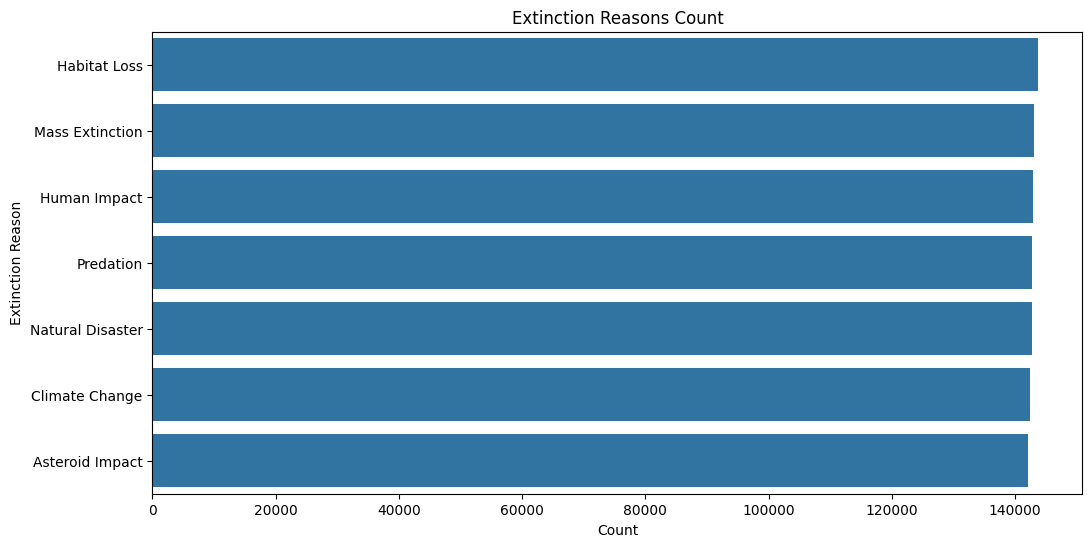

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Extinction Reason', data=df, order=df['Extinction Reason'].value_counts().index)
plt.title('Extinction Reasons Count')
plt.xlabel('Count')
plt.ylabel('Extinction Reason')
plt.show()

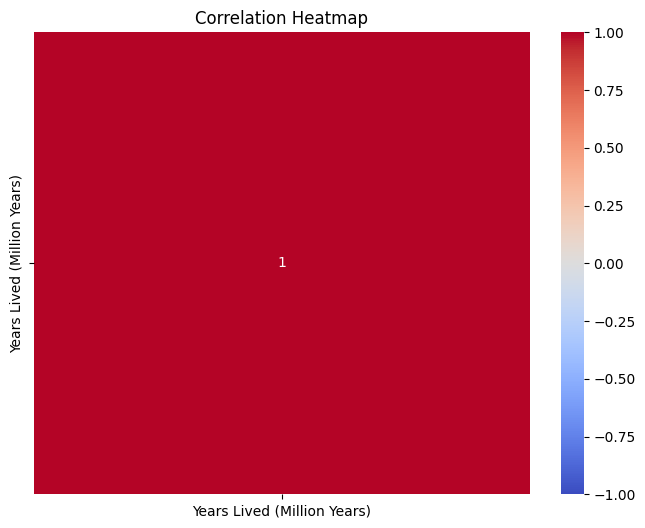

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df_encoded = pd.get_dummies(df, columns=['Extinction Reason'])

In [12]:
X = df_encoded.drop(columns=['Species Name'])
y = df['Extinction Reason']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy, report, conf_matrix

(1.0,
 '                  precision    recall  f1-score   support\n\n Asteroid Impact       1.00      1.00      1.00     42417\n  Climate Change       1.00      1.00      1.00     42797\n    Habitat Loss       1.00      1.00      1.00     43063\n    Human Impact       1.00      1.00      1.00     43043\n Mass Extinction       1.00      1.00      1.00     42813\nNatural Disaster       1.00      1.00      1.00     42940\n       Predation       1.00      1.00      1.00     42927\n\n        accuracy                           1.00    300000\n       macro avg       1.00      1.00      1.00    300000\n    weighted avg       1.00      1.00      1.00    300000\n',
 array([[42417,     0,     0,     0,     0,     0,     0],
        [    0, 42797,     0,     0,     0,     0,     0],
        [    0,     0, 43063,     0,     0,     0,     0],
        [    0,     0,     0, 43043,     0,     0,     0],
        [    0,     0,     0,     0, 42813,     0,     0],
        [    0,     0,     0,     0,     